# Security teams receive huge logs from IDS/IPS/SIEM.
# Build an NLP summarizer that extracts and clusters phishing-related events, highlighting attack trends for faster analyst response.

## 1.1 Import required libraries

In [242]:
import pandas as pd
import numpy as np


## 1.2 Load the SIEM dataset

In [243]:
df = pd.read_csv(r"C:\Users\preet\Downloads\clean_semantic_phishing_siem_1000.csv")



## 1.3 View first 5 rows

In [244]:
df.head()

,timestamp,source,severity,message
0,2025-02-10 08:00:00,SIEM,LOW,draw committee authorized remittance for recipient ledger
1,2025-02-10 08:00:12,SIEM,HIGH,authentication fabric disabled user profile due to anomaly score
2,2025-02-10 08:00:24,SIEM,LOW,audio engagement layer initiated authority impersonation targeting human operator
3,2025-02-10 08:00:36,SIEM,HIGH,jackpot office recorded allocation for payout account
4,2025-02-10 08:00:48,IPS,MEDIUM,control module isolated session token due to risk escalation


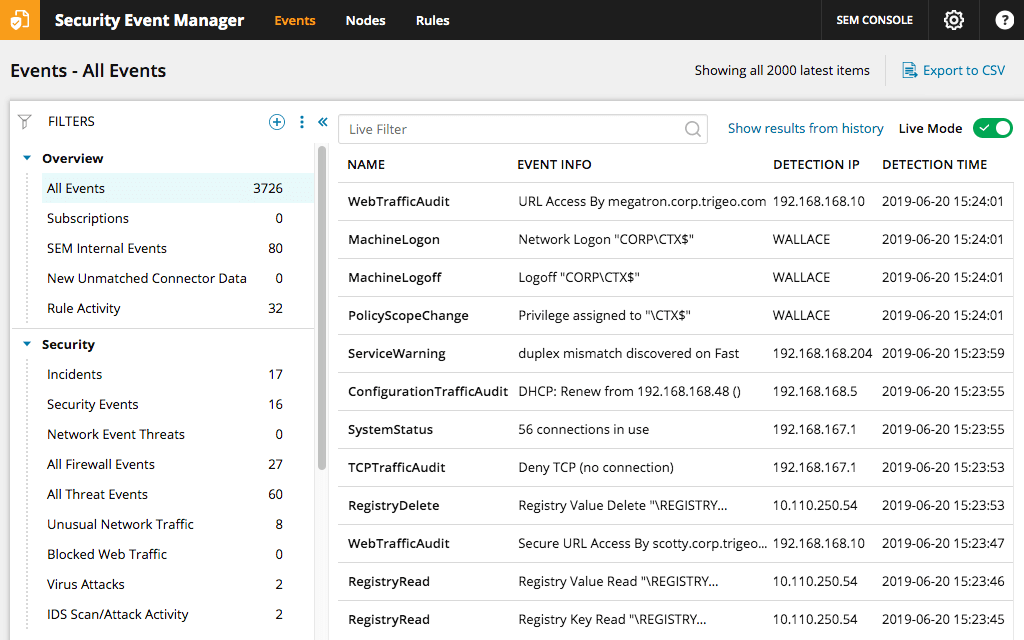

In [245]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\preet\Downloads\Network_Security_Monitoring_Software_Use_case_type_1_1_Features_Array_Item_-_features_item_image.png"))


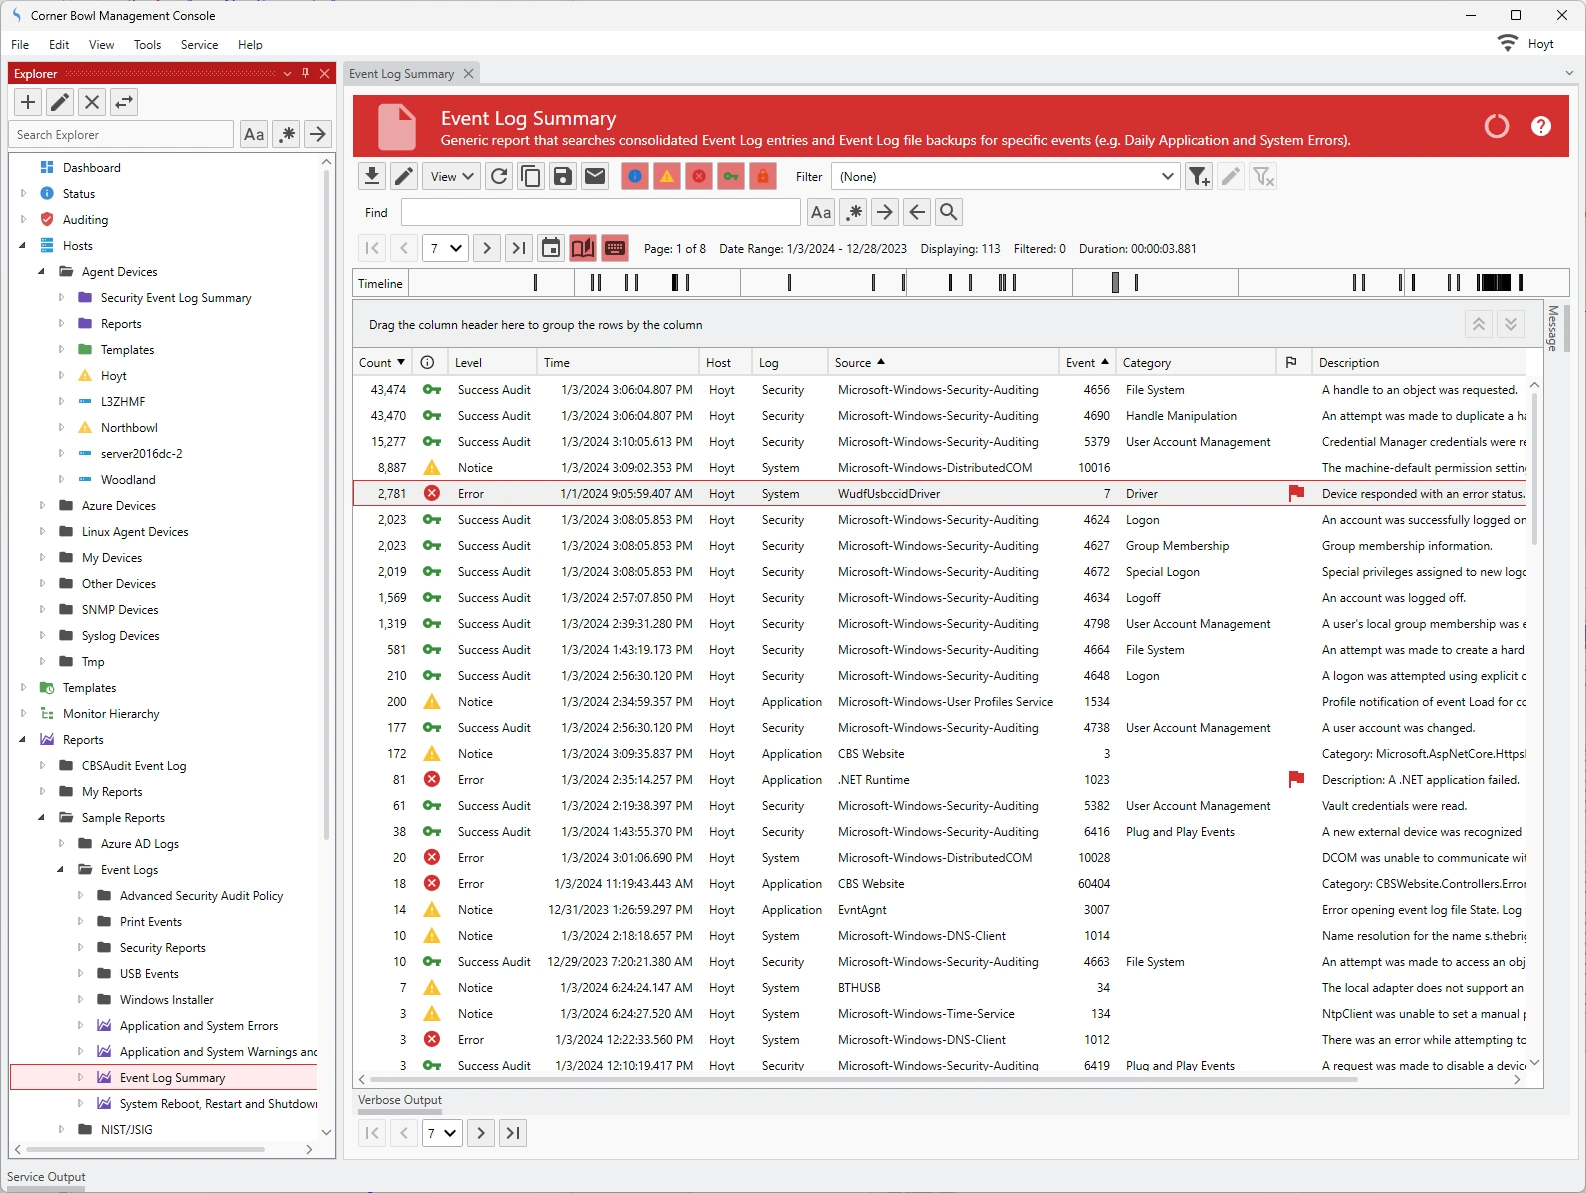

In [246]:
from IPython.display import Image, display

display(Image(filename=r"C:\Users\preet\Downloads\Sample-Event-Log-Management-Report.webp"))


## 1.4 Check dataset structure

In [247]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1000 non-null   object
 1   source     1000 non-null   object
 2   severity   1000 non-null   object
 3   message    1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


## checking missing values 

In [248]:
df.isnull().sum()

timestamp    0
source       0
severity     0
message      0
dtype: int64

## checking for duplicate values

In [249]:
df.duplicated().sum()

np.int64(0)

## 2.1 message column

In [250]:
df['message'].head()


0                            draw committee authorized remittance for recipient ledger
1                     authentication fabric disabled user profile due to anomaly score
2    audio engagement layer initiated authority impersonation targeting human operator
3                                jackpot office recorded allocation for payout account
4                         control module isolated session token due to risk escalation
Name: message, dtype: object

## 2.2 Create a working text column

In [251]:
df['text'] = df['message']


In [252]:
df[['message', 'text']].head()


,message,text
0,draw committee authorized remittance for recipient ledger,draw committee authorized remittance for recipient ledger
1,authentication fabric disabled user profile due to anomaly score,authentication fabric disabled user profile due to anomaly score
2,audio engagement layer initiated authority impersonation targeting human operator,audio engagement layer initiated authority impersonation targeting human operator
3,jackpot office recorded allocation for payout account,jackpot office recorded allocation for payout account
4,control module isolated session token due to risk escalation,control module isolated session token due to risk escalation


## Source distribution

In [253]:
df['source'].value_counts()


source
IPS     355
SIEM    336
IDS     309
Name: count, dtype: int64

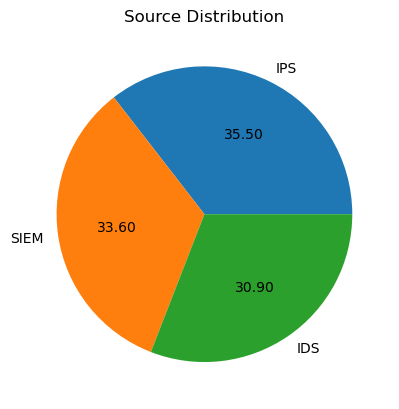

In [254]:
import matplotlib.pyplot as plt
plt.pie(df['source'].value_counts(), labels=['IPS','SIEM','IDS'],autopct ="%0.2f")
plt.title("Source Distribution")
plt.show()

## Severity distribution

In [255]:
df['severity'].value_counts()


severity
MEDIUM    342
HIGH      330
LOW       328
Name: count, dtype: int64

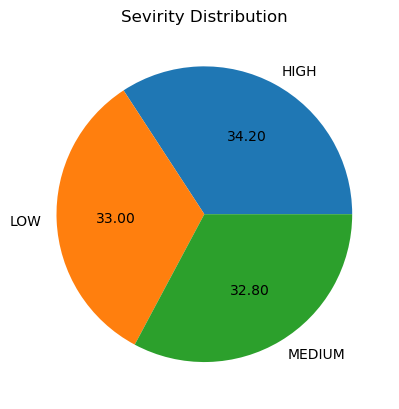

In [256]:

plt.pie(df['severity'].value_counts(), labels=['HIGH','LOW','MEDIUM'],autopct ="%0.2f")
plt.title("Sevirity Distribution")
plt.show()

## Message length

In [257]:
df['message_length'] = df['text'].apply(len)
df['message_length'].describe()


count    1000.000000
mean       65.226000
std         8.205013
min        51.000000
25%        57.000000
50%        65.000000
75%        72.000000
max        84.000000
Name: message_length, dtype: float64

# STEP 3: TEXT PREPROCESSING
Lowercasing

Tokenization

Removing stopwords

Removing punctuation

Stemming

## 3.1 Install & Download NLTK Resources

In [258]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')


## 3.2 Import NLP Utilities

In [259]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


## 3.3 Initialize Stopwords & Stemmer 

In [260]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()





## 3.4 Define the Preprocessing Function (IMPORTANT)

In [261]:
def preprocess_text(text):
    
    
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    
    tokens = [word for word in tokens if word.isalnum()]
    
    
    tokens = [word for word in tokens if word not in stop_words]
    
    
    tokens = [stemmer.stem(word) for word in tokens]
    
    return " ".join(tokens)


In [262]:
preprocess_text("Hello my name is preetham , i am persuing my bachelors in AIML from MSRIT")

'hello name preetham persu bachelor aiml msrit'

## 3.5 Apply Preprocessing to SIEM Logs

In [263]:
df['processed_text'] = df['text'].apply(preprocess_text)


In [264]:
df.head()

,timestamp,source,severity,message,text,message_length,processed_text
0,2025-02-10 08:00:00,SIEM,LOW,draw committee authorized remittance for recipient ledger,draw committee authorized remittance for recipient ledger,57,draw committe author remitt recipi ledger
1,2025-02-10 08:00:12,SIEM,HIGH,authentication fabric disabled user profile due to anomaly score,authentication fabric disabled user profile due to anomaly score,64,authent fabric disabl user profil due anomali score
2,2025-02-10 08:00:24,SIEM,LOW,audio engagement layer initiated authority impersonation targeting human operator,audio engagement layer initiated authority impersonation targeting human operator,81,audio engag layer initi author imperson target human oper
3,2025-02-10 08:00:36,SIEM,HIGH,jackpot office recorded allocation for payout account,jackpot office recorded allocation for payout account,53,jackpot offic record alloc payout account
4,2025-02-10 08:00:48,IPS,MEDIUM,control module isolated session token due to risk escalation,control module isolated session token due to risk escalation,60,control modul isol session token due risk escal


In [265]:
df[['text', 'processed_text']].tail(5)

,text,processed_text
995,telephony workflow simulated authority impersonation targeting end user,telephoni workflow simul author imperson target end user
996,draw committee released entitlement for payout account,draw committe releas entitl payout account
997,authentication fabric limited session token due to anomaly score,authent fabric limit session token due anomali score
998,audio engagement layer launched authority impersonation targeting support agent,audio engag layer launch author imperson target support agent
999,winnings authority authorized entitlement for claimant profile,win author author entitl claimant profil


# STEP 4:  VECTORIZATION 

In [266]:
pip install sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [295]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

X = model.encode(df['processed_text'], show_progress_bar=True)




Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [296]:
X.shape

(1000, 384)

# STEP 5: CLUSTERING SIEM LOGS USING AgglomerativeClustering

## 5.1 DBscan

In [297]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.3,
    min_samples=5,
    metric='cosine'
)

labels = dbscan.fit_predict(X)
df['cluster'] = labels


In [298]:
df[['message', 'cluster']].head(10)


,message,cluster
0,draw committee authorized remittance for recipient ledger,0
1,authentication fabric disabled user profile due to anomaly score,1
2,audio engagement layer initiated authority impersonation targeting human operator,2
3,jackpot office recorded allocation for payout account,0
4,control module isolated session token due to risk escalation,1
5,telephony workflow triggered compliance coercion targeting support agent,2
6,raffle board confirmed allocation for beneficiary record,0
7,ledger interface revoked identity state due to state inconsistency,1
8,audio engagement layer executed authority impersonation targeting staff member,2
9,prize council released distribution for recipient ledger,0


In [299]:
from sklearn.metrics import silhouette_score
import numpy as np
labels = df['cluster']
mask = labels != -1

X_clustered = X[mask]
labels_clustered = labels[mask]
score = silhouette_score(X_clustered, labels_clustered, metric='cosine')
print("Silhouette Score:", score)


Silhouette Score: 0.2923366129398346


## 5.2 Cluster Distribution 

In [300]:
df['cluster'].value_counts()


cluster
0    334
1    333
2    333
Name: count, dtype: int64

# Install WordCloud

In [301]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [302]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [350]:
text_all = " ".join(df['processed_text'])

wc = WordCloud(width=800,height=400,background_color='black')

wc.generate(text_all)


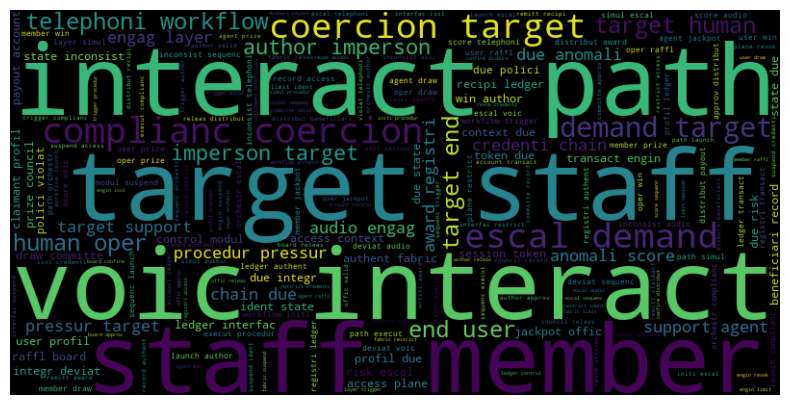

In [351]:
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [305]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
all_words = []

for text in df['processed_text']:
    all_words.extend(text.split())
word_freq = Counter(all_words)
word_freq.most_common(10)
freq_df = pd.DataFrame(word_freq.most_common(15), columns=['word', 'count'])
freq_df



,word,count
0,due,333
1,target,333
2,author,193
3,escal,149
4,ledger,143
5,user,141
6,state,139
7,access,125
8,profil,120
9,record,120


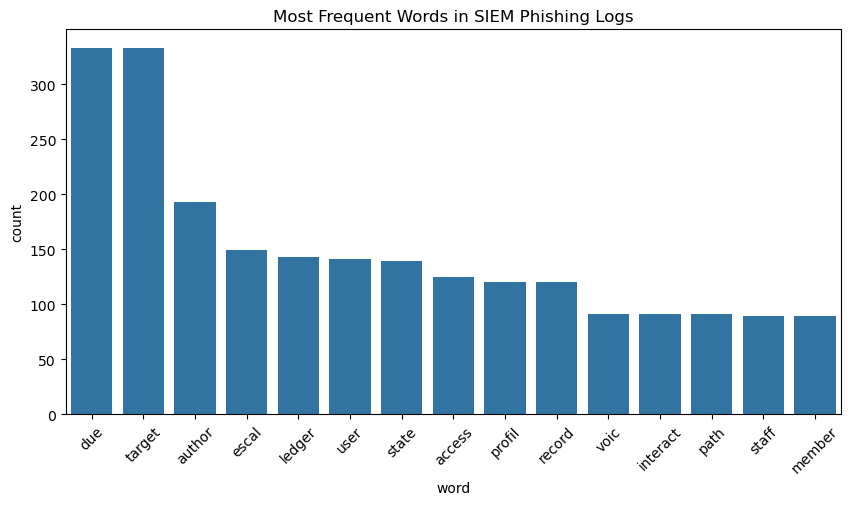

In [306]:
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=freq_df)
plt.xticks(rotation=45)
plt.title("Most Frequent Words in SIEM Phishing Logs")
plt.show()


## CLUSTER 0

In [307]:
cluster0_words = []
for text in df[df['cluster']==0]['processed_text']:
    cluster0_words.extend(text.split())

Counter(cluster0_words).most_common(10)
freq_df0 = pd.DataFrame(Counter(cluster0_words).most_common(10), columns=['word', 'count'])
freq_df0


,word,count
0,record,120
1,author,113
2,award,76
3,registri,76
4,distribut,74
5,prize,72
6,council,72
7,draw,70
8,committe,70
9,win,70


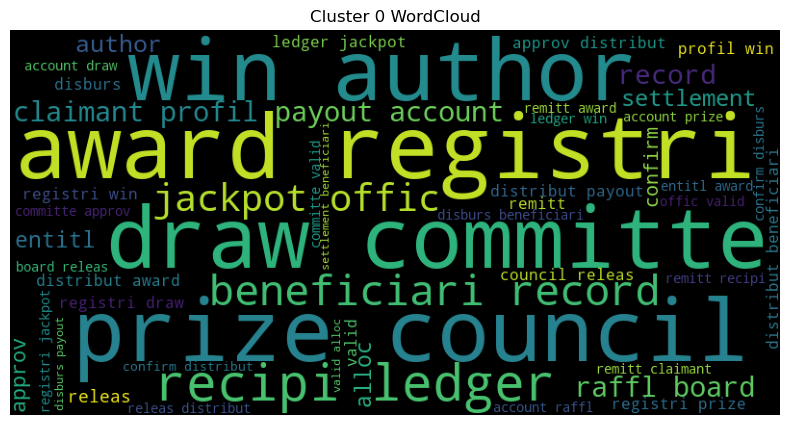

In [308]:
cluster0_text = " ".join(df[df['cluster']==0]['processed_text'])

wc0 = WordCloud(width=800, height=400, background_color='black')
wc0.generate(cluster0_text)

plt.figure(figsize=(10,5))
plt.imshow(wc0)
plt.axis('off')
plt.title("Cluster 0 WordCloud")
plt.show()


## CLUSTER 1

In [309]:
cluster1_words = []
for text in df[df['cluster']==1]['processed_text']:
    cluster1_words.extend(text.split())

Counter(cluster1_words).most_common(10)
freq_df1 = pd.DataFrame(Counter(cluster1_words).most_common(10), columns=['word', 'count'])
freq_df1


,word,count
0,due,333
1,state,139
2,access,125
3,anomali,77
4,score,77
5,credenti,75
6,chain,75
7,ledger,74
8,interfac,74
9,inconsist,73


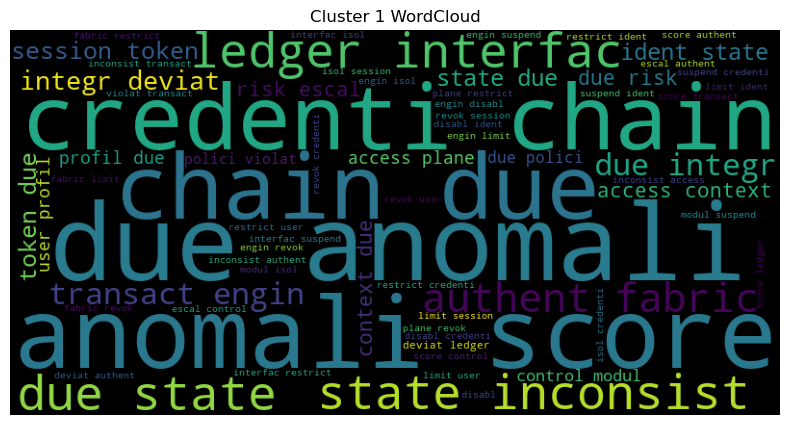

In [310]:
cluster1_text = " ".join(df[df['cluster']==1]['processed_text'])

wc1 = WordCloud(width=800, height=400, background_color='black')
wc1.generate(cluster1_text)

plt.figure(figsize=(10,5))
plt.imshow(wc1)
plt.axis('off')
plt.title("Cluster 1 WordCloud")
plt.show()


## CLUSTER 2

In [311]:
cluster2_words = []
for text in df[df['cluster']==2]['processed_text']:
    cluster2_words.extend(text.split())

Counter(cluster2_words).most_common(10)
freq_df2 = pd.DataFrame(Counter(cluster2_words).most_common(10), columns=['word', 'count'])
freq_df2



,word,count
0,target,333
1,voic,91
2,interact,91
3,path,91
4,staff,89
5,member,89
6,complianc,87
7,coercion,87
8,escal,86
9,demand,86


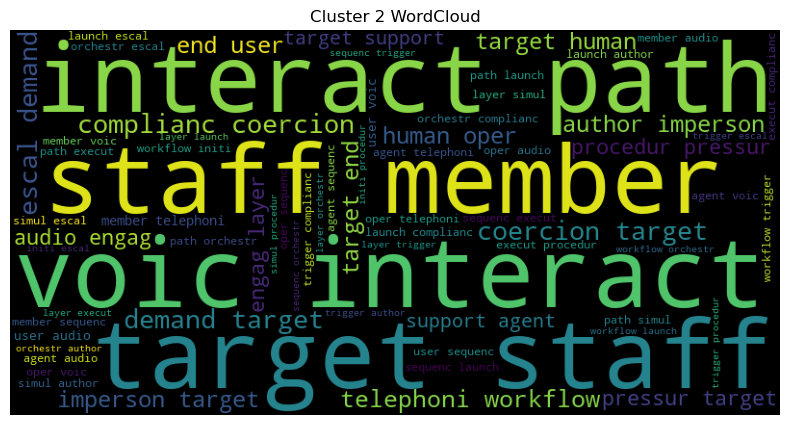

In [349]:
cluster2_text = " ".join(df[df['cluster']==2]['processed_text'])

wc2 = WordCloud(width=800, height=400, background_color='black')
wc2.generate(cluster2_text)

plt.figure(figsize=(10,5))
plt.imshow(wc2)
plt.axis('off')
plt.title("Cluster 2 WordCloud")
plt.show()


# 7.1 View Sample Messages from Each Cluster

## DBscan

In [313]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [354]:
for i in range(3):
    print(f"\n🔹 Sample messages from Cluster {i}:")
    print(df[df['cluster'] == i]['message'].head(5))




🔹 Sample messages from Cluster 0:
0     draw committee authorized remittance for recipient ledger
3         jackpot office recorded allocation for payout account
6      raffle board confirmed allocation for beneficiary record
9      prize council released distribution for recipient ledger
12       raffle board confirmed settlement for claimant profile
Name: message, dtype: object

🔹 Sample messages from Cluster 1:
1           authentication fabric disabled user profile due to anomaly score
4               control module isolated session token due to risk escalation
7         ledger interface revoked identity state due to state inconsistency
10    transaction engine restricted session token due to state inconsistency
13             transaction engine limited session token due to anomaly score
Name: message, dtype: object

🔹 Sample messages from Cluster 2:
2     audio engagement layer initiated authority impersonation targeting human operator
5              telephony workflow triggered 

In [361]:
df['cluster'].value_counts()


cluster
0    334
1    333
2    333
Name: count, dtype: int64

# AgglomerativeClustering

In [362]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model2 = AgglomerativeClustering(
    n_clusters=3,
    metric='cosine',
    linkage='average'
)

labels1 = model2.fit_predict(X)
df['cluster1'] = labels1

# Correct silhouette score
score = silhouette_score(X, labels1, metric='cosine')
print("Silhouette Score (Agglomerative):", score)


Silhouette Score (Agglomerative): 0.2923366129398346


In [363]:
df[['message', 'cluster1']].head(10)

,message,cluster1
0,draw committee authorized remittance for recipient ledger,2
1,authentication fabric disabled user profile due to anomaly score,0
2,audio engagement layer initiated authority impersonation targeting human operator,1
3,jackpot office recorded allocation for payout account,2
4,control module isolated session token due to risk escalation,0
5,telephony workflow triggered compliance coercion targeting support agent,1
6,raffle board confirmed allocation for beneficiary record,2
7,ledger interface revoked identity state due to state inconsistency,0
8,audio engagement layer executed authority impersonation targeting staff member,1
9,prize council released distribution for recipient ledger,2


In [357]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X, df['cluster1'])
dbi


2.2278105907233265

In [358]:
for i in range(3):
    print(f"\n🔹 Sample messages from Cluster {i}:")
    print(df[df['cluster1'] == i]['message'].head())


🔹 Sample messages from Cluster 0:
1           authentication fabric disabled user profile due to anomaly score
4               control module isolated session token due to risk escalation
7         ledger interface revoked identity state due to state inconsistency
10    transaction engine restricted session token due to state inconsistency
13             transaction engine limited session token due to anomaly score
Name: message, dtype: object

🔹 Sample messages from Cluster 1:
2     audio engagement layer initiated authority impersonation targeting human operator
5              telephony workflow triggered compliance coercion targeting support agent
8        audio engagement layer executed authority impersonation targeting staff member
11             telephony workflow orchestrated escalation demand targeting staff member
14      voice interaction path orchestrated compliance coercion targeting support agent
Name: message, dtype: object

🔹 Sample messages from Cluster 2:
0     draw c

In [359]:
df['cluster'].unique()


array([0, 1, 2])

In [360]:
df['cluster1'].value_counts()


cluster1
2    334
0    333
1    333
Name: count, dtype: int64

# KMEANS 

In [364]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

labels2 = kmeans.fit_predict(X)
df['cluster3'] = labels2

# CORRECT silhouette score for K-Means
score = silhouette_score(X, labels2)
print("Silhouette Score (K-Means):", score)


Silhouette Score (K-Means): 0.17123806476593018


C:\Users\preet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [365]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X, df['cluster3'])
dbi

2.2278105907233265

In [366]:
for i in range(k):
    print(f"\n🔹 Sample messages from Cluster {i}:")
    print(df[df['cluster3'] == i]['message'].head(5))



🔹 Sample messages from Cluster 0:
2     audio engagement layer initiated authority impersonation targeting human operator
5              telephony workflow triggered compliance coercion targeting support agent
8        audio engagement layer executed authority impersonation targeting staff member
11             telephony workflow orchestrated escalation demand targeting staff member
14      voice interaction path orchestrated compliance coercion targeting support agent
Name: message, dtype: object

🔹 Sample messages from Cluster 1:
0     draw committee authorized remittance for recipient ledger
3         jackpot office recorded allocation for payout account
6      raffle board confirmed allocation for beneficiary record
9      prize council released distribution for recipient ledger
12       raffle board confirmed settlement for claimant profile
Name: message, dtype: object

🔹 Sample messages from Cluster 2:
1           authentication fabric disabled user profile due to anomaly score


In [367]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, df['cluster3'])
score

0.17123806476593018

In [368]:
cluster_summary = {}

for c in df['cluster1'].unique():
    if c != -1:
        sample_msgs = df[df['cluster1'] == c]['message'].head(3)
        cluster_summary[c] = " | ".join(sample_msgs)

cluster_summary


{np.int64(2): 'draw committee authorized remittance for recipient ledger | jackpot office recorded allocation for payout account | raffle board confirmed allocation for beneficiary record',
 np.int64(0): 'authentication fabric disabled user profile due to anomaly score | control module isolated session token due to risk escalation | ledger interface revoked identity state due to state inconsistency',
 np.int64(1): 'audio engagement layer initiated authority impersonation targeting human operator | telephony workflow triggered compliance coercion targeting support agent | audio engagement layer executed authority impersonation targeting staff member'}

# STEP 6: TREND ANALYSIS

## 1: Severity distribution This shows how many HIGH / MEDIUM / LOW alerts occurred.

<Axes: title={'center': 'Severity Distribution of Security Logs'}, xlabel='severity'>

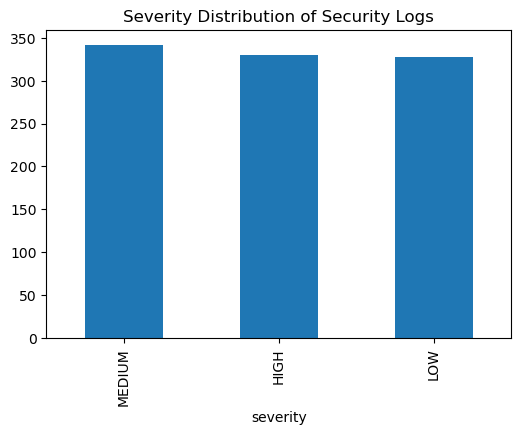

In [373]:
severity_counts = df['severity'].value_counts()

severity_counts.plot(
    kind='bar',
    figsize=(6,4),
    title='Severity Distribution of Security Logs'
)


## 2: Severity trend by SOURCE

<Axes: title={'center': 'Severity vs Source (IDS / IPS / SIEM)'}, xlabel='source'>

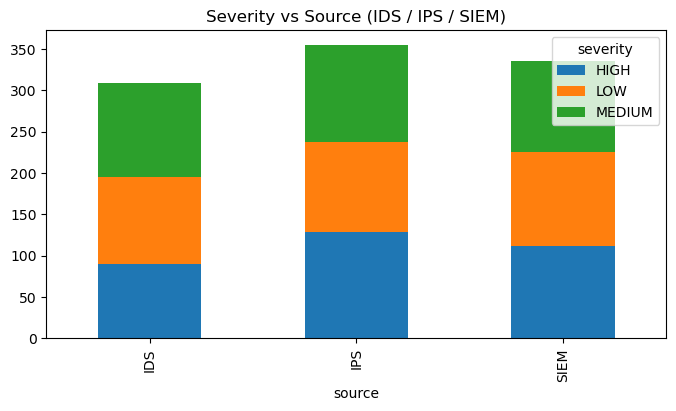

In [374]:
severity_trend = df.groupby(['source', 'severity']).size().unstack(fill_value=0)

severity_trend.plot(
    kind='bar',
    stacked=True,
    figsize=(8,4),
    title='Severity vs Source (IDS / IPS / SIEM)'
)


In [369]:
df['phishing_type'].value_counts()


phishing_type
Lottery / Reward Impersonation    334
Account / System Compromise       333
Voice / Social Engineering        333
Name: count, dtype: int64

In [370]:
pd.crosstab(df['phishing_type'], df['source'])


source,IDS,IPS,SIEM
phishing_type,,,
Account / System Compromise,98,122,113
Lottery / Reward Impersonation,102,116,116
Voice / Social Engineering,109,117,107


In [333]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp').resample('1H').size()


C:\Users\preet\AppData\Local\Temp\ipykernel_25552\232843417.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('timestamp').resample('1H').size()


timestamp
2025-02-10 08:00:00    300
2025-02-10 09:00:00    300
2025-02-10 10:00:00    300
2025-02-10 11:00:00    100
Freq: h, dtype: int64

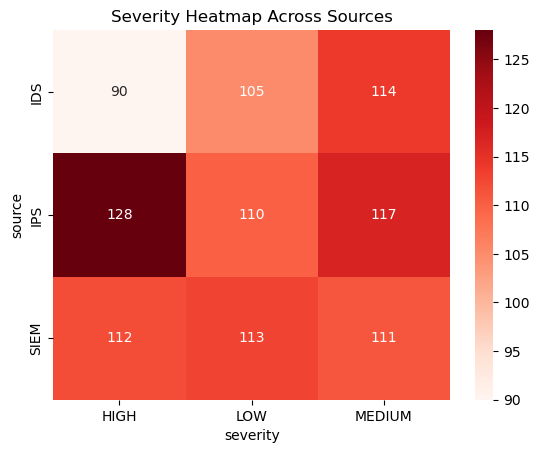

In [380]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_heatmap = pd.crosstab(df['source'], df['severity'])

sns.heatmap(severity_heatmap, annot=True, fmt='d', cmap='Reds')
plt.title('Severity Heatmap Across Sources')
plt.show()


In [345]:
def classify_multiple_logs(log_list):
    cluster_names = {
        0: "Lottery / Reward Impersonation",
        1: "Account / System Compromise",
        2: "Voice / Social Engineering",
        -1: "Noise / Unknown"
    }

    temp_df = df.copy()

    for log in log_list:
        log['processed_text'] = preprocess_text(log['message'])
        temp_df.loc[len(temp_df)] = log

    X_temp = model.encode(
        temp_df['processed_text'].tolist(),
        show_progress_bar=False
    )

    labels = dbscan.fit_predict(X_temp)
    new_labels = labels[-len(log_list):]

    results = []
    for i, cid in enumerate(new_labels):
        results.append({
            "message": log_list[i]['message'],
            "cluster_id": int(cid),
            "cluster_name": cluster_names.get(cid, "Unknown")
        })

    return results


In [348]:
custom_row = logs = [
    {
        "timestamp": "2025-02-15 12:30:00",
        "source": "SIEM",
        "severity": "HIGH",
        "message": "telephony workflow triggered authority impersonation targeting support staff"
    },
    {
        "timestamp": "2025-02-15 12:31:10",
        "source": "IDS",
        "severity": "MEDIUM",
        "message": "authentication fabric disabled user profile due to anomaly score"
    },
    {
        "timestamp": "2025-02-15 12:32:25",
        "source": "IPS",
        "severity": "HIGH",
        "message": "raffle board confirmed allocation for beneficiary record"
    },
    {
        "timestamp": "2025-02-15 12:33:40",
        "source": "SIEM",
        "severity": "HIGH",
        "message": "voice interaction path executed compliance coercion targeting helpdesk operator"
    },
    {
        "timestamp": "2025-02-15 12:34:55",
        "source": "IDS",
        "severity": "LOW",
        "message": "transaction engine restricted access context due to state inconsistency"
    },
    {
        "timestamp": "2025-02-15 12:36:05",
        "source": "IPS",
        "severity": "HIGH",
        "message": "prize council released settlement for claimant profile"
    },
    {
        "timestamp": "2025-02-15 12:37:20",
        "source": "SIEM",
        "severity": "MEDIUM",
        "message": "call handling sequence triggered procedural pressure targeting employee"
    },
    {
        "timestamp": "2025-02-15 12:38:45",
        "source": "IDS",
        "severity": "HIGH",
        "message": "ledger interface revoked identity state due to risk escalation"
    },
    {
        "timestamp": "2025-02-15 12:40:00",
        "source": "IPS",
        "severity": "HIGH",
        "message": "jackpot office validated remittance for recipient ledger"
    },
    {
        "timestamp": "2025-02-15 12:41:30",
        "source": "SIEM",
        "severity": "HIGH",
        "message": "audio engagement layer initiated authority impersonation targeting human operator"
    },
    {
        "timestamp": "2025-02-15 12:43:10",
        "source": "IDS",
        "severity": "MEDIUM",
        "message": "control module isolated session token due to anomaly score"
    },
    {
        "timestamp": "2025-02-15 12:44:50",
        "source": "IPS",
        "severity": "HIGH",
        "message": "draw committee authorized remittance for recipient ledger"
    },
    {
        "timestamp": "2025-02-15 12:46:05",
        "source": "SIEM",
        "severity": "HIGH",
        "message": "telephony workflow orchestrated escalation demand targeting staff member"
    },
    {
        "timestamp": "2025-02-15 12:47:35",
        "source": "IDS",
        "severity": "LOW",
        "message": "access plane restricted user profile due to state inconsistency"
    },
    {
        "timestamp": "2025-02-15 12:49:00",
        "source": "IPS",
        "severity": "HIGH",
        "message": "raffle board recorded distribution for beneficiary record"
    }
]


classify_multiple_logs(custom_row)

[{'message': 'telephony workflow triggered authority impersonation targeting support staff',
  'cluster_id': 2,
  'cluster_name': 'Voice / Social Engineering'},
 {'message': 'authentication fabric disabled user profile due to anomaly score',
  'cluster_id': 1,
  'cluster_name': 'Account / System Compromise'},
 {'message': 'raffle board confirmed allocation for beneficiary record',
  'cluster_id': 0,
  'cluster_name': 'Lottery / Reward Impersonation'},
 {'message': 'voice interaction path executed compliance coercion targeting helpdesk operator',
  'cluster_id': 2,
  'cluster_name': 'Voice / Social Engineering'},
 {'message': 'transaction engine restricted access context due to state inconsistency',
  'cluster_id': 1,
  'cluster_name': 'Account / System Compromise'},
 {'message': 'prize council released settlement for claimant profile',
  'cluster_id': 0,
  'cluster_name': 'Lottery / Reward Impersonation'},
 {'message': 'call handling sequence triggered procedural pressure targeting emp